<h1 style="text-align:center">Projekt 1</h1>

<h1 style="text-align:center">Inżynieria cech, wstępne modelowanie</h1>
<h1 style="text-align:center"><u>School grades</u></h1>
<h1 style="text-align:center"> Karol Degórski i Adrian Kamiński</h1>

### Import potrzebnych pakietów

In [1]:
from datetime import datetime # time all notebook compilation time
start = datetime.now()

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.set_option('max_colwidth', None)

from matplotlib import pyplot as plt
import seaborn as sns

import random
random.seed(44)
np.random.seed(44)

import warnings
warnings.filterwarnings('ignore')

### Wczytanie danych dotyczących szkolnych ocen

In [3]:
school_grades_df = pd.read_csv('school_grades_dataset.csv')
school_grades_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [4]:
yes_no_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
other_binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus']
ohe_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
le_cols = yes_no_cols + other_binary_cols

### Kodowanie zmiennych nieliczbowych

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [6]:
school_grades_df_encoded = school_grades_df.copy()

labelencoder = LabelEncoder()

school_grades_df_encoded[le_cols] = school_grades_df[le_cols].apply(
    func = lambda x: labelencoder.fit_transform(x)
)

enc = OneHotEncoder()
enc_df = pd.DataFrame(
    enc.fit_transform(school_grades_df_encoded[ohe_cols]).toarray(),
    columns = enc.get_feature_names(input_features = ohe_cols)
)

school_grades_df_encoded = school_grades_df_encoded.join(enc_df).drop(ohe_cols, axis = 1)

In [7]:
school_grades_df_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,15,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,1,0,18,1,1,1,3,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,1,0,18,1,0,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Stworzenie osobnego zbioru danych, aby móc porównywać wyniki

In [8]:
school_grades_df_encoded2 = school_grades_df_encoded.copy(deep = True)

### Grupowanie i usunięcie niektórych zmiennych

In [9]:
school_grades_df_encoded.absences = np.log1p(school_grades_df_encoded.absences)

In [10]:
school_grades_df_encoded2.loc[school_grades_df_encoded2['absences'] <= 4, 'absences' ] = 0
school_grades_df_encoded2.loc[(school_grades_df_encoded2['absences'] > 4) 
                              & (school_grades_df_encoded2['absences'] <= 8), 'absences' ] = 1
school_grades_df_encoded2.loc[(school_grades_df_encoded2['absences'] > 8)  
                              & (school_grades_df_encoded2['absences'] <= 12), 'absences' ] = 2
school_grades_df_encoded2.loc[school_grades_df_encoded2['absences'] > 12, 'absences' ] = 3

In [11]:
school_grades_df_encoded2 = school_grades_df_encoded2.drop(['romantic', 'famrel', 
                                                            'paid', 'famsup', 'Pstatus', 'famsize'], axis = 1)

### Podział zbioru na treningowy i testowy

Tworzymy 4 feature set'y:
* with_exams - zbiór zawierający wszystkie kolumny
* without_exams - zbiór nie zawierający kolumn G1 i G2
* with_exams_optimized - zbiór zawierający kolumny G1 i G2, ale zoptymalizowany (niektóre kolumny usunięte oraz przeprowadzone grupowanie oraz skalowanie)
* without_exams_optimized - zbiór nie zawierający kolumn G1 i G2 i zoptymalizowany (niektóre kolumny usunięte oraz przeprowadzone grupowanie oraz skalowanie)

In [12]:
X_with_exams = school_grades_df_encoded.drop('G3', axis = 1)
X_without_exams = school_grades_df_encoded.drop(['G1', 'G2', 'G3'], axis = 1)

X_with_exams_optimized = school_grades_df_encoded2.drop('G3', axis = 1)
X_without_exams_optimized = school_grades_df_encoded2.drop(['G1', 'G2', 'G3'], axis = 1)

y = school_grades_df_encoded.G3

In [13]:
from sklearn.preprocessing import minmax_scale

school_grades_df_encoded2[['age']] = minmax_scale(school_grades_df_encoded2[['age']])

In [14]:
from sklearn.model_selection import train_test_split

Dokonujemy podziału na zbiór testowy i treningowy (Zbiór testowy będzie stanowił 30% całego zbioru)

In [15]:
X_with_exams_train, X_with_exams_test, y_with_exams_train, y_with_exams_test = train_test_split(
    X_with_exams, y, test_size=0.3, random_state=42)

X_without_exams_train, X_without_exams_test, y_without_exams_train, y_without_exams_test = train_test_split(
    X_without_exams, y, test_size=0.3, random_state=42)

X_with_exams_optimized_train, X_with_exams_optimized_test, y_with_exams_optimized_train, y_with_exams_optimized_test = train_test_split(
    X_with_exams_optimized, y, test_size=0.3, random_state=42)

X_without_exams_optimized_train, X_without_exams_optimized_test, y_without_exams_optimized_train, y_without_exams_optimized_test = train_test_split(
    X_without_exams_optimized, y, test_size=0.3, random_state=42)

In [16]:
X_train = [X_with_exams_train, X_without_exams_train, X_with_exams_optimized_train, X_without_exams_optimized_train] 
X_test = [X_with_exams_test, X_without_exams_test, X_with_exams_optimized_test, X_without_exams_optimized_test]
y_train = [y_with_exams_train, y_without_exams_train, y_with_exams_optimized_train, y_without_exams_optimized_train]
y_test = [y_with_exams_test, y_without_exams_test, y_with_exams_optimized_test, y_without_exams_optimized_test]

In [17]:
from sklearn.preprocessing import minmax_scale 

Skalowanie zbiorów zoptymalizowanych (komentarz odnosnie wyników na końcu)

In [18]:
# for i in [2, 3]:
#     X_train[i][['Medu', 'Fedu', 'traveltime',
#                 'studytime', 'failures']] = minmax_scale(X_train[i][['Medu', 'Fedu', 'traveltime', 
#                                                                             'studytime', 'failures']])
#     X_test[i][['Medu', 'Fedu', 'traveltime',
#                'studytime', 'failures']] = minmax_scale(X_test[i][['Medu', 'Fedu', 'traveltime', 
#                                                                           'studytime', 'failures']])

In [19]:
stop_prepare_data = datetime.now()

### Wybór metryki

W naszym zadaniu do oceny modeli wykorzytsamy miarę RMSE, czyli pierwiastek z błędu średniokwadratowego. Miara ta wydaje się być odpowiednią z uwagi na swego rodzaju ciągłość zmiennej celu, jaką jest ocena końcowa G3. Oceniając model najistotniejsze jest dla nas, czy przewidywana przez dany model ocena znacząco różni się od tej prawdziwej. Niekoniecznie ważne jest czy dokładnie przewidzeliśmy ocenę.

In [20]:
from sklearn.metrics import mean_squared_error

### Las losowy

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
def fit_predict_rmse(model_with_exams, model_without_exams, model_with_exams_optimized, model_without_exams_optimized):
    model_hat = [0] *4
    models = [model_with_exams, model_without_exams, model_with_exams_optimized, model_without_exams_optimized]
    
    rmse = []
    
    for i in range(4):
        models[i].fit(X_train[i], y_train[i])
        model_hat[i] = models[i].predict(X_test[i])

        rmse.append(mean_squared_error(y_test[i], model_hat[i], squared = False))
        
    return rmse, model_hat

In [23]:
rfc_with_exams = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)
rfc_without_exams = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)

rfc_with_exams_optimized = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)
rfc_without_exams_optimized = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)

In [24]:
rfc_mse, rfc_hat = fit_predict_rmse(
    rfc_with_exams,
    rfc_without_exams,
    rfc_with_exams_optimized,
    rfc_without_exams_optimized
)

In [25]:
def DrawPlot(y_test, y_hat, classifier):
    
    feature_sets = ["With exams", "Without exams", "With exams optimized", "Without exams optimized"] 
    
    fig, axs = plt.subplots(2, 2, figsize = (16,8), sharey = True, sharex=True)
    
    for i in range(4):
        j = 0 if i < 2 else 1
        
        axs[i%2][j].scatter (x = y_hat[i], y = y_test[i], color = "#FFC300")
        axs[i%2][j].plot([0, 20], [0, 20], color = "black")
        axs[i%2][j].set_title("Feature set: " + feature_sets[i] +
              " - RMSE = " + str(round(mean_squared_error(y_test[i], y_hat[i], squared = False), 4)))
        if j == 0:
            axs[i%2][j].set_ylabel("Gold standard")
        if i%2 == 1:
            axs[i%2][j].set_xlabel("Wartość przybliżona")
    fig.suptitle(classifier, fontsize=18)
    
    plt.show()

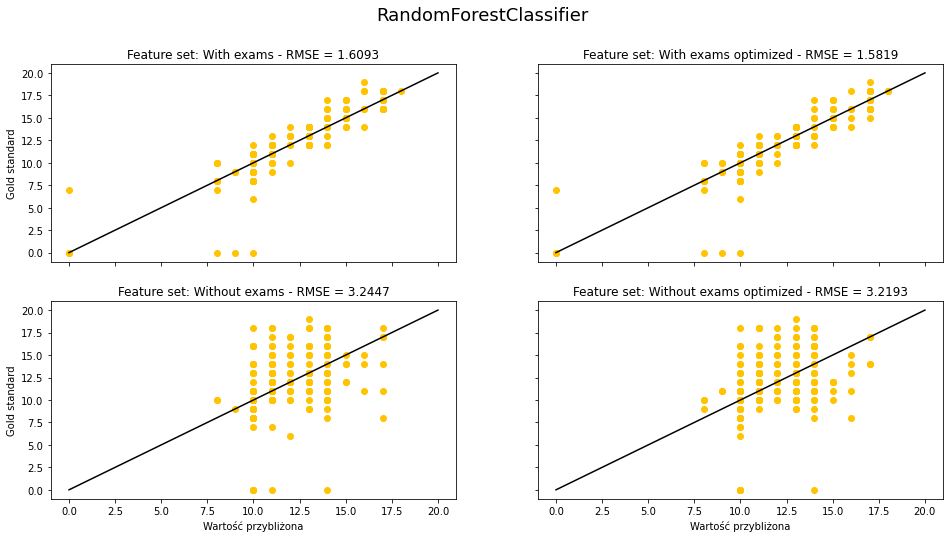

In [26]:
DrawPlot(y_test, rfc_hat, "RandomForestClassifier")

### XGBoost

In [27]:
from xgboost import XGBClassifier
xgbc_with_exams=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_without_exams=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_with_exams_optimized=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_without_exams_optimized=XGBClassifier(random_state=1,
                    eval_metric="logloss")

In [28]:
xgbc_mse, xgbc_hat = fit_predict_rmse(
    xgbc_with_exams,
    xgbc_without_exams,
    xgbc_with_exams_optimized,
    xgbc_without_exams_optimized
)

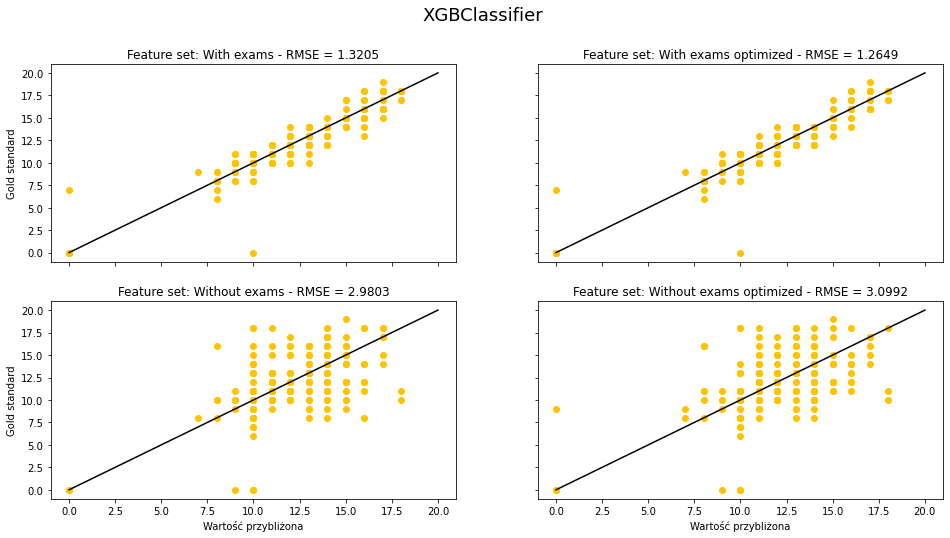

In [29]:
DrawPlot(y_test, xgbc_hat, "XGBClassifier")

### Stacking Classifier

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [31]:
clf_with_exams = StackingClassifier(estimators=[('RFC', rfc_with_exams),
                                                ('xgb', xgbc_with_exams)],
                                    final_estimator=LogisticRegression())
clf_without_exams = StackingClassifier(estimators=[('RFC', rfc_without_exams),
                                                   ('xgb', xgbc_without_exams)],
                                       final_estimator=LogisticRegression())

clf_with_exams_optimized = StackingClassifier(estimators=[('RFC', rfc_with_exams_optimized),
                                                          ('xgb', xgbc_with_exams_optimized)],
                                              final_estimator=LogisticRegression())
clf_without_exams_optimized = StackingClassifier(estimators=[('RFC', rfc_without_exams_optimized),
                                                             ('xgb', xgbc_without_exams_optimized)],
                                                 final_estimator=LogisticRegression())

In [32]:
clf_mse, clf_hat = fit_predict_rmse(
    clf_with_exams, 
    clf_without_exams, 
    clf_with_exams_optimized, 
    clf_without_exams_optimized)

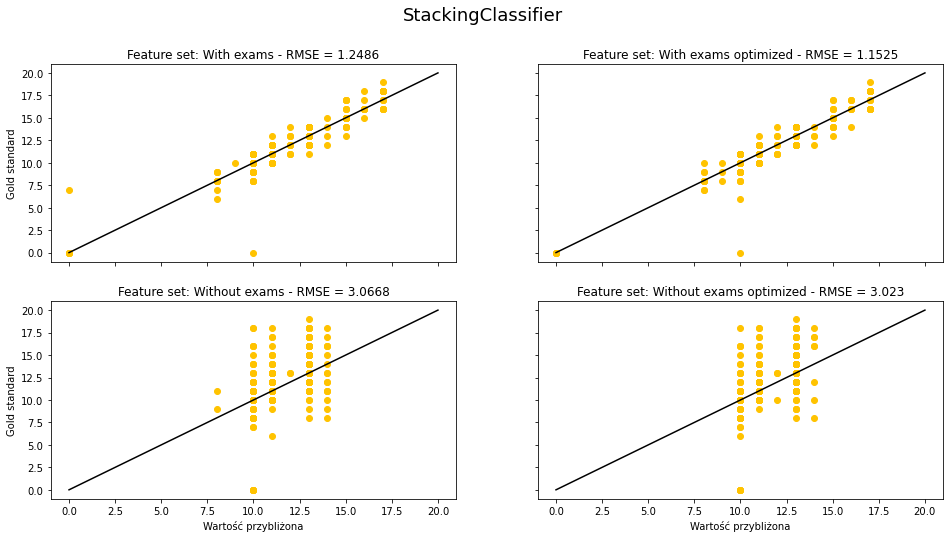

In [33]:
DrawPlot(y_test, clf_hat, "StackingClassifier")

### Voting Classifier

In [34]:
from sklearn.ensemble import VotingClassifier

In [35]:
vc_with_exams = VotingClassifier(estimators=[('RFC', rfc_with_exams),
                                             ('xgb', xgbc_with_exams)],
                                 voting='soft')
vc_without_exams = VotingClassifier(estimators=[('RFC', rfc_without_exams),
                                                ('xgb', xgbc_without_exams)],
                                    voting='soft')
vc_with_exams_optimized = VotingClassifier(estimators=[('RFC', rfc_with_exams_optimized), 
                                                       ('xgb', xgbc_with_exams_optimized)],
                                           voting='soft')
vc_without_exams_optimized = VotingClassifier(estimators=[('RFC', rfc_without_exams_optimized), 
                                                          ('xgb', xgbc_without_exams_optimized)],
                                              voting='soft')

In [36]:
vc_mse, vc_hat = fit_predict_rmse(
    vc_with_exams,
    vc_without_exams,
    vc_with_exams_optimized,
    vc_without_exams_optimized)

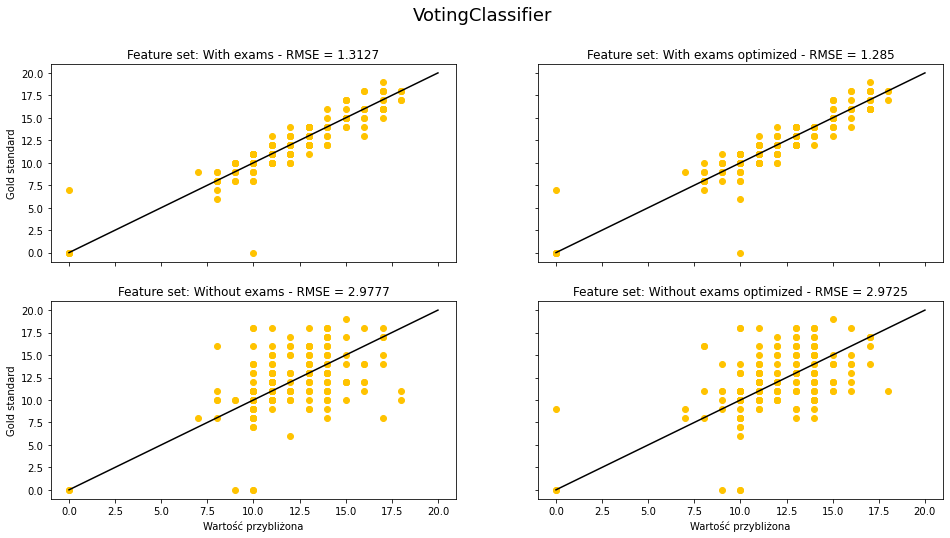

In [37]:
DrawPlot(y_test, vc_hat,'VotingClassifier')

### Sieć neuronowa typu MLP

In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlpc_with_exams = MLPClassifier(random_state=1)
mlpc_without_exams = MLPClassifier(random_state=1)
mlpc_with_exams_optimized = MLPClassifier(random_state=1)
mlpc_without_exams_optimized = MLPClassifier(random_state=1)

In [40]:
mlpc_mse, mlpc_hat = fit_predict_rmse(
    mlpc_with_exams,
    mlpc_without_exams,
    mlpc_with_exams_optimized,
    mlpc_without_exams_optimized
)

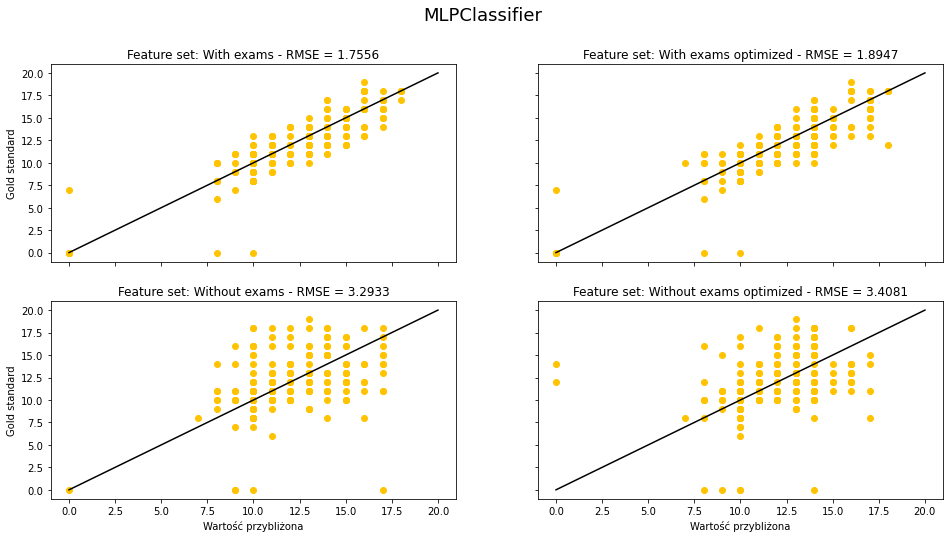

In [41]:
DrawPlot(y_test, mlpc_hat, 'MLPClassifier')

### Regresja liniowa

Potraktujmy nasze zadanie jako problem regresji i zastosujmy podstawową metodę uczenia maszynowego, jaką jest regresja liniowa

Tworzymy naszą własną regresję aby zwracała wartości całkowite

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
class MyLinearRegression(LinearRegression):
    
    def predict(self, X):
        return np.round(super().predict(X))

In [44]:
lr_with_exams = MyLinearRegression()
lr_without_exams = MyLinearRegression()

lr_with_exams_optimized = MyLinearRegression()
lr_without_exams_optimized = MyLinearRegression()

In [45]:
lr_mse, lr_hat = fit_predict_rmse(
    lr_with_exams,
    lr_without_exams,
    lr_with_exams_optimized,
    lr_without_exams_optimized
)

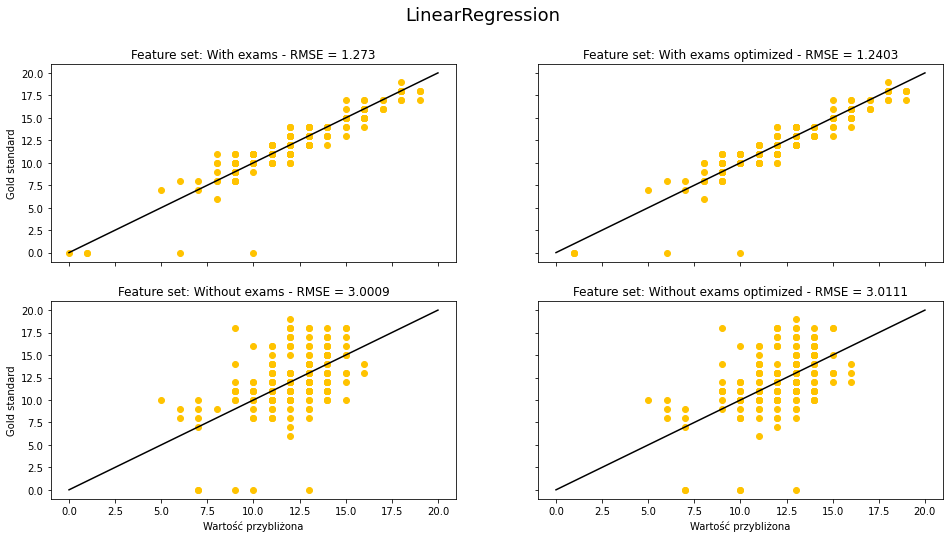

In [46]:
DrawPlot(y_test, lr_hat, 'LinearRegression')

In [47]:
stop_fitting_basic = datetime.now()

### Podsumowanie

In [48]:
def plot_results(rfc_mse, xgbc_mse,
                 clf_mse, vc_mse,
                 mlpc_mse, lr_mse,
                exams = True):
    i = abs(exams - 1)
    first_set = "z egzaminami" if exams else "bez egzaminów"
    second_set = "zoptymalizowanym z egzaminami" if exams else "zopytymalizowanym bez egzaminów"
    
    fig, axs = plt.subplots(1, 2, figsize = (16, 4), sharey = True)
    x= np.array(['Las losowy', 'XGBoost', 'Stacking Classifier', 'Voting Classifier',
                 'Sieć neuronowa typu MLP', 'Regresja liniowa'])
    y = np.array([rfc_mse[i], xgbc_mse[i], clf_mse[i], 
                  vc_mse[i], mlpc_mse[i], lr_mse[i]])
    
    if lr_mse[0] == None: # plot_results tunned
        x = x[0:-1]
        y = y[0:-1]
    
    plot_data = pd.DataFrame({
            'x': x,
            'y': y})

    sns.barplot(data = plot_data, x=x, y=y,
                order=plot_data.sort_values(['y']).x, color = 'grey', ax=axs[0])
    
    axs[0].set_title('Porównanie modeli na zbiorze '+ first_set)

    axs[0].set_ylabel("RMSE")


    y = np.array([rfc_mse[i+2], xgbc_mse[i+2],
                  clf_mse[i+2], vc_mse[i+2],
                  mlpc_mse[i+2], lr_mse[i+2]])
    
    if lr_mse[0] == None: # plot_results tunned
        y = y[0:-1]
    plot_data_optimized = pd.DataFrame({
            'x': x,
            'y': y})

    sns.barplot(data = plot_data_optimized, x=x, y=y,
                order=plot_data_optimized.sort_values(['y']).x, color = 'grey', ax=axs[1])
    axs[1].set_title('Porównanie modeli na zbiorze ' + second_set)


    for i in range(0, 2):    
        for tick in axs[i].get_xticklabels():
            tick.set_rotation(45)

    plt.show()

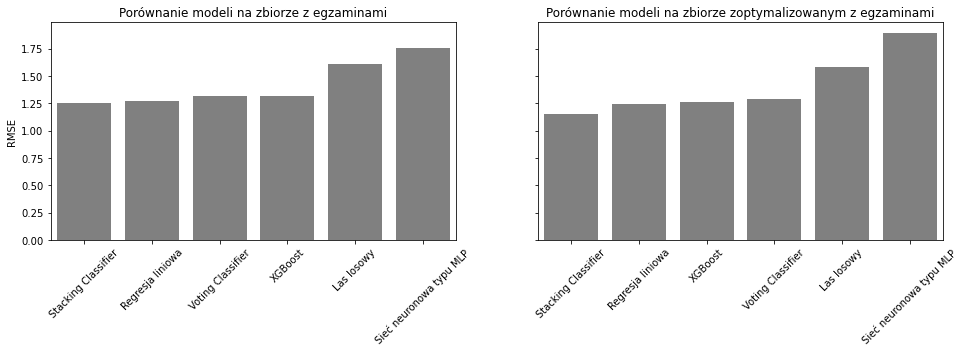

In [49]:
plot_results(rfc_mse, xgbc_mse,
             clf_mse, vc_mse,
             mlpc_mse, lr_mse,
             True)

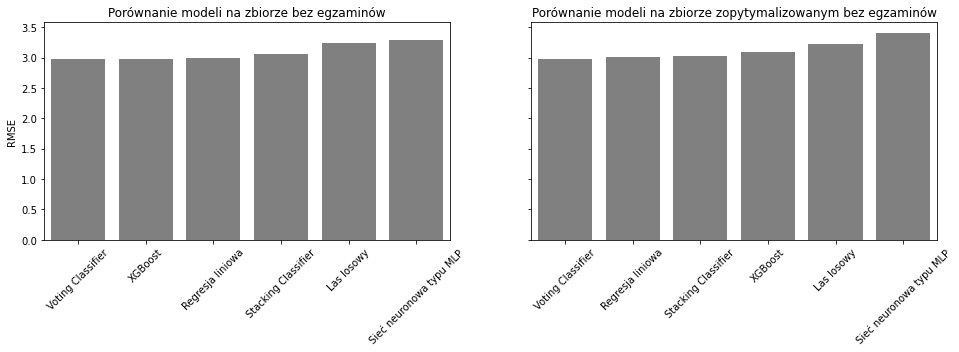

In [50]:
plot_results(rfc_mse, xgbc_mse,
             clf_mse, vc_mse,
             mlpc_mse, lr_mse,
             False)

Okazuje się, że Stacking Classifier oraz zwykła podstawowa metoda, jaką jest regresja liniowa przewidują z dużą dokładnością naszą zmienną celu G3 (mają najmniejszy pierwiastek błędu średniokwadratowego) na zbiorze z egzaminami, natomiast Voting Classifier poradził sobie najlepiej na zbiorze bez egzaminów.

Tak jak się spodziewaliśmy, dokładność predykcji na zbiorze z egzaminami (uwzględniającym oceny G1 i G2) jest znacząco większa niż na zbiorze bez egzaminów, który tych ocen nie uwzględnia. Wynika to z bardzo dużej korelcji między tymi ocenami, a oceną G3.

Pogrupowanie zmiennej absences oraz przeskalowanie zmiennej age pozwoliło na uzyskanie bardziej dokładnych wyników (zbiory zoptymalizowane)

Nasze modele wymagają jeszcze wyboru hiperametrów

### Strojenie hiperparametrów

W celu wyboru hiperparametrów skorzystamy z Random search'a

In [51]:
from sklearn.model_selection import RandomizedSearchCV

#### Las losowy

In [52]:
rfc_with_exams = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)
rfc_without_exams = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)

rfc_with_exams_optimized = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)
rfc_without_exams_optimized = RandomForestClassifier(n_estimators=500, 
                               random_state = 0,
                               n_jobs = -1)

In [53]:
rfc_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [54]:
def optimize(model_with_exams, model_without_exams, model_with_exams_optimized, model_without_exams_optimized, parameters):
    models_rand = [0] * 4
    models_rand[0] = RandomizedSearchCV(
        model_with_exams, parameters, cv=3, n_iter=20, scoring='neg_root_mean_squared_error',
        n_jobs = -1,
        random_state = 44
    )
    models_rand[0].fit(X_with_exams_train, y_with_exams_train)
    
    models_rand[1] = RandomizedSearchCV(
        model_without_exams, parameters, cv=3, n_iter=20, scoring='neg_root_mean_squared_error',
        n_jobs = -1,
        random_state = 44
    )
    models_rand[1].fit(X_without_exams_train, y_without_exams_train)
    
    models_rand[2] = RandomizedSearchCV(
        model_with_exams_optimized, parameters, cv=3, n_iter=20, scoring='neg_root_mean_squared_error',
        n_jobs = -1,
        random_state = 44
    )
    models_rand[2].fit(X_with_exams_optimized_train, y_with_exams_optimized_train)
    
    models_rand[3] = RandomizedSearchCV(
        model_without_exams_optimized, parameters, cv=3, n_iter=20, scoring='neg_root_mean_squared_error',
        n_jobs = -1,
        random_state = 44
    )
    models_rand[3].fit(X_without_exams_optimized_train, y_without_exams_optimized_train)
    
    return models_rand

In [55]:
def create_best_models(models_rand):
    models_tunned = [model_rand.best_estimator_ for model_rand in models_rand]
    return models_tunned[0], models_tunned[1], models_tunned[2], models_tunned[3]

In [56]:
rfc_rand = optimize(
    rfc_with_exams, rfc_without_exams,
    rfc_with_exams_optimized, rfc_without_exams_optimized,
    rfc_parameters)

In [57]:
rfc_tunned_with_exams, rfc_tunned_without_exams, rfc_tunned_with_exams_optimized, rfc_tunned_without_exams_optimized = create_best_models(
    rfc_rand
)

In [58]:
def print_best(model_rand):
    print("Best params: ",model_rand.best_params_, "\nBest RMSE:   ", abs(model_rand.best_score_))

In [59]:
def print_best_all(models_rand, model_name):
    feature_sets_names = ["With exams: ", "Without exams: ", "With exams optimized: ", "Without exams optimized: "]
    print(model_name, "\n")
    for i in range(0, 4):
        print(feature_sets_names[i])
        print_best(models_rand[i])
        if i == 3:
            break
        print("\n")

In [60]:
print_best_all(rfc_rand, "RandomForestClassifier")

RandomForestClassifier 

With exams: 
Best params:  {'min_samples_split': 6, 'max_features': 10, 'max_depth': 6, 'criterion': 'entropy'} 
Best RMSE:    1.5676528755161385


Without exams: 
Best params:  {'min_samples_split': 4, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'} 
Best RMSE:    2.855954966756689


With exams optimized: 
Best params:  {'min_samples_split': 6, 'max_features': 10, 'max_depth': 6, 'criterion': 'entropy'} 
Best RMSE:    1.5757923671883678


Without exams optimized: 
Best params:  {'min_samples_split': 4, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'} 
Best RMSE:    2.8222423056278534


In [61]:
rfc_tunned_mse, rfc_tunned_hat = fit_predict_rmse(
    rfc_tunned_with_exams, rfc_tunned_without_exams, 
    rfc_tunned_with_exams_optimized, rfc_tunned_without_exams_optimized
)

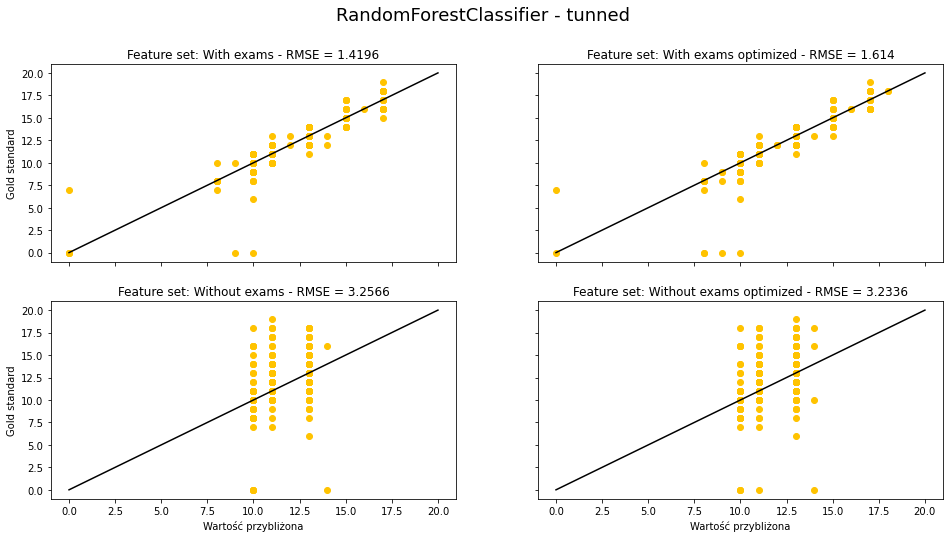

In [62]:
DrawPlot(y_test, rfc_tunned_hat, "RandomForestClassifier - tunned")

#### XGBoost

In [63]:
xgbc_with_exams=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_without_exams=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_with_exams_optimized=XGBClassifier(random_state=1,
                    eval_metric="logloss")
xgbc_without_exams_optimized=XGBClassifier(random_state=1,
                    eval_metric="logloss")

In [64]:
from scipy.stats import uniform

In [65]:
xgbc_parameters = {
    'learning_rate': uniform(loc=0.001, scale=0.1),
    'max_without_exams_optimizedepth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'booster': ['gbtree', 'gblinear', 'dart']
}

In [66]:
xgbc_rand = optimize(
    xgbc_with_exams, xgbc_without_exams,
    xgbc_with_exams_optimized, xgbc_without_exams_optimized,
    xgbc_parameters)

In [67]:
xgbc_tunned_with_exams, xgbc_tunned_without_exams, xgbc_tunned_with_exams_optimized, xgbc_tunned_without_exams_optimized = create_best_models(
    xgbc_rand
)

In [68]:
print_best_all(xgbc_rand, "XGBoost")

XGBoost 

With exams: 
Best params:  {'booster': 'dart', 'learning_rate': 0.008250781339763612, 'max_without_exams_optimizedepth': 7} 
Best RMSE:    1.3907315376610259


Without exams: 
Best params:  {'booster': 'gblinear', 'learning_rate': 0.08146397256356941, 'max_without_exams_optimizedepth': 10} 
Best RMSE:    3.12915897379845


With exams optimized: 
Best params:  {'booster': 'gbtree', 'learning_rate': 0.018289492658229912, 'max_without_exams_optimizedepth': 4} 
Best RMSE:    1.4158945076074614


Without exams optimized: 
Best params:  {'booster': 'gblinear', 'learning_rate': 0.06682711447416938, 'max_without_exams_optimizedepth': 10} 
Best RMSE:    3.1053790740947425


In [69]:
xgbc_tunned_mse, xgbc_tunned_hat = fit_predict_rmse(
    xgbc_tunned_with_exams, xgbc_tunned_without_exams,
    xgbc_tunned_with_exams_optimized, xgbc_tunned_without_exams_optimized
)

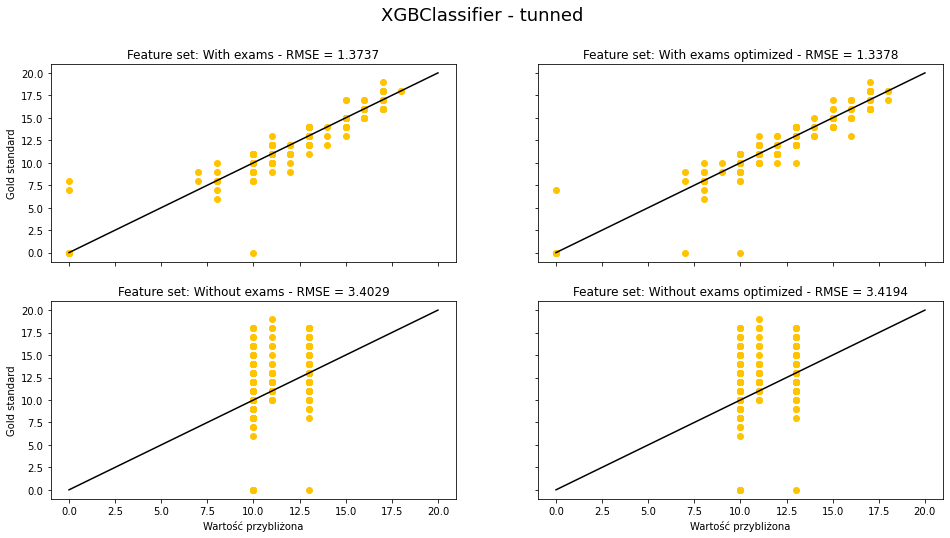

In [70]:
DrawPlot(y_test, xgbc_tunned_hat, "XGBClassifier - tunned")

#### Stacking Classifier

In [71]:
clf_tunned_with_exams = StackingClassifier(
    estimators=[('RFC', rfc_tunned_with_exams),
                ('xgb', xgbc_tunned_with_exams)],
    final_estimator=LogisticRegression()
)
clf_tunned_without_exams = StackingClassifier(
    estimators=[('RFC', rfc_tunned_without_exams),
                ('xgb', xgbc_tunned_without_exams)],
    final_estimator=LogisticRegression()
)

clf_tunned_with_exams_optimized = StackingClassifier(
    estimators=[('RFC', rfc_tunned_with_exams_optimized),
                ('xgb', xgbc_tunned_with_exams_optimized)],
    final_estimator=LogisticRegression()
)
clf_tunned_without_exams_optimized = StackingClassifier(
    estimators=[('RFC', rfc_tunned_without_exams_optimized),
                ('xgb', xgbc_tunned_without_exams_optimized)], 
    final_estimator=LogisticRegression()
)

In [72]:
clf_tunned_mse, clf_tunned_hat = fit_predict_rmse(
    clf_tunned_with_exams, clf_tunned_without_exams,
    clf_tunned_with_exams_optimized, clf_tunned_without_exams_optimized)

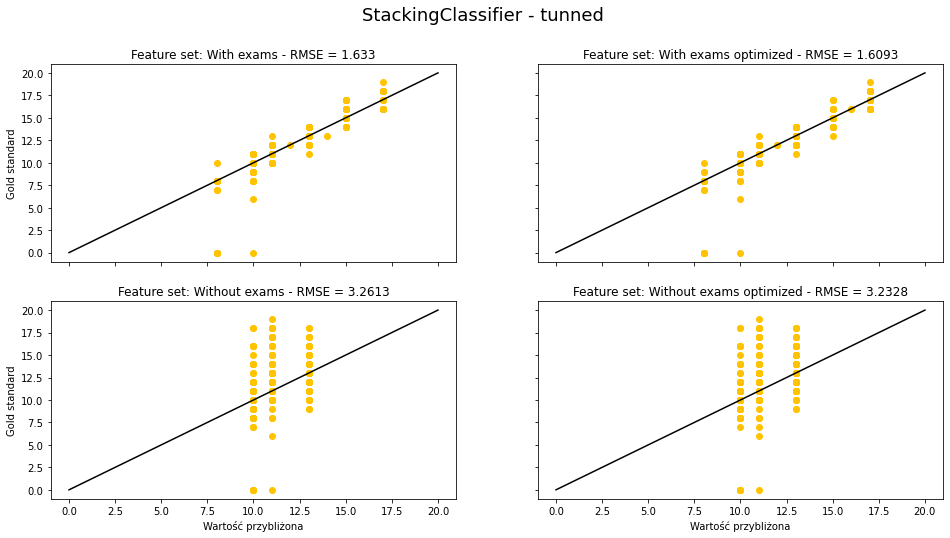

In [73]:
DrawPlot(y_test, clf_tunned_hat, "StackingClassifier - tunned")

#### Voting Classifier

In [74]:
vc_tunned_with_exams = VotingClassifier(estimators=[('RFC', rfc_tunned_with_exams),
                                                    ('xgb', xgbc_tunned_with_exams)], 
                                        voting='soft')
vc_tunned_without_exams = VotingClassifier(estimators=[('RFC', rfc_tunned_without_exams),
                                                       ('xgb', xgbc_tunned_without_exams)],
                                           voting='soft')
vc_tunned_with_exams_optimized = VotingClassifier(estimators=[('RFC', rfc_tunned_with_exams_optimized),
                                                              ('xgb', xgbc_tunned_with_exams_optimized)], 
                                                  voting='soft')
vc_tunned_without_exams_optimized = VotingClassifier(estimators=[('RFC', rfc_tunned_without_exams_optimized),
                                                                 ('xgb', xgbc_tunned_without_exams_optimized)],
                                                     voting='soft')

In [75]:
vc_tunned_mse, vc_tunned_hat = fit_predict_rmse(
    vc_tunned_with_exams, vc_tunned_without_exams,
    vc_tunned_with_exams_optimized, vc_tunned_without_exams_optimized)

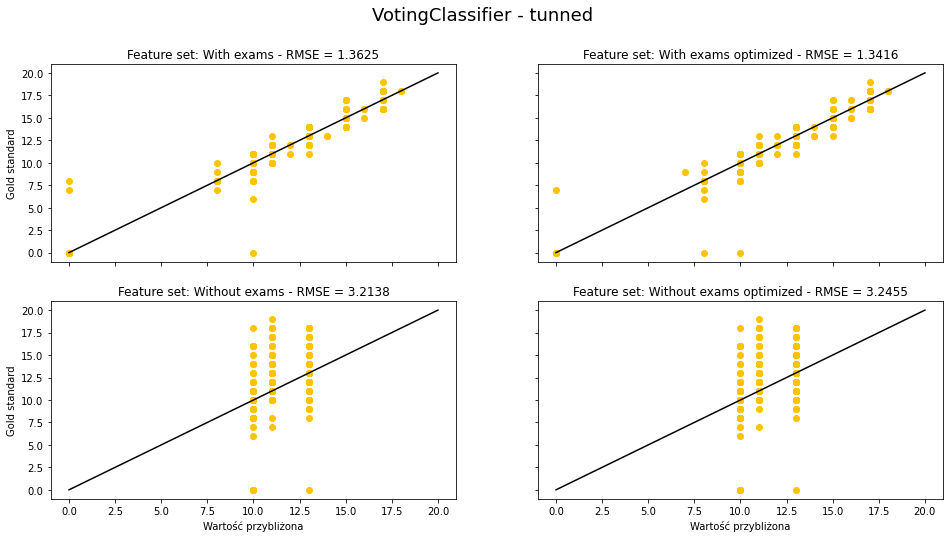

In [76]:
DrawPlot(y_test, vc_tunned_hat,'VotingClassifier - tunned')

#### Sieć neuronowa typu MLPC

In [77]:
mlpc_with_exams = MLPClassifier(random_state=1)
mlpc_without_exams = MLPClassifier(random_state=1)
mlpc_with_exams_optimized = MLPClassifier(random_state=1)
mlpc_without_exams_optimized = MLPClassifier(random_state=1)

In [78]:
mlpc_parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': uniform(0.00001, 0.05),
    'learning_rate': ['constant','adaptive'],
    'momentum': uniform(0, 1),
    'batch_size': [10, 20, 40, 60, 80, 100]
}

In [79]:
mlpc_rand = optimize(
    mlpc_with_exams, mlpc_without_exams, 
    mlpc_with_exams_optimized, mlpc_without_exams_optimized,
    mlpc_parameters)

In [80]:
mlpc_tunned_with_exams, mlpc_tunned_without_exams, mlpc_tunned_with_exams_optimized, mlpc_tunned_without_exams_optimized = create_best_models(
    mlpc_rand
)

In [81]:
print_best_all(mlpc_rand, "MLPClassifier")

MLPClassifier 

With exams: 
Best params:  {'activation': 'relu', 'alpha': 0.03899660137584881, 'batch_size': 60, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'momentum': 0.41893439668259447, 'solver': 'adam'} 
Best RMSE:    1.6370719488960679


Without exams: 
Best params:  {'activation': 'tanh', 'alpha': 0.00010898794623297014, 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'momentum': 0.4936352725997194, 'solver': 'sgd'} 
Best RMSE:    2.930661346108465


With exams optimized: 
Best params:  {'activation': 'logistic', 'alpha': 0.03233052812016968, 'batch_size': 40, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'momentum': 0.1391462519849035, 'solver': 'lbfgs'} 
Best RMSE:    1.7202418538496682


Without exams optimized: 
Best params:  {'activation': 'tanh', 'alpha': 0.00010898794623297014, 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'momentum': 0.4936352725997194, 'solve

In [82]:
mlpc_tunned_mse, mlpc_tunned_hat = fit_predict_rmse(
    mlpc_tunned_with_exams, mlpc_tunned_without_exams,
    mlpc_tunned_with_exams_optimized, mlpc_tunned_without_exams_optimized
)

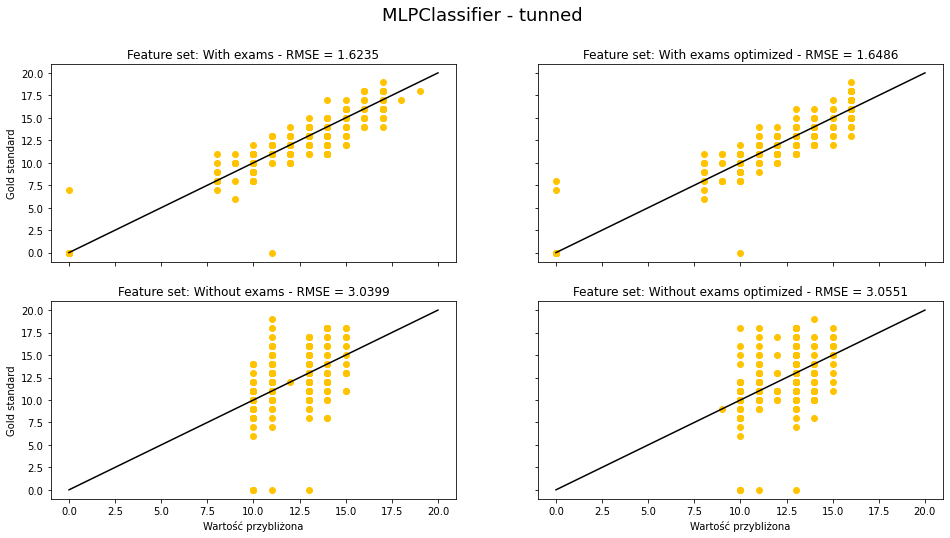

In [83]:
DrawPlot(y_test, mlpc_tunned_hat, "MLPClassifier - tunned")

In [84]:
stop_tunning = datetime.now()

### Podsumowanie

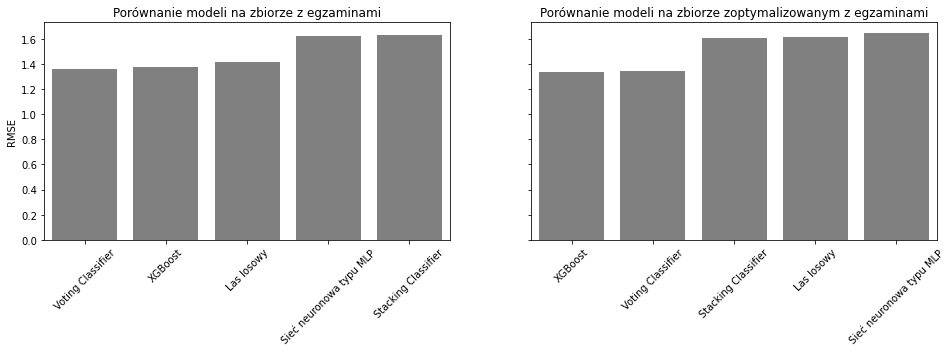

In [85]:
plot_results(rfc_tunned_mse, xgbc_tunned_mse,
             clf_tunned_mse, vc_tunned_mse,
             mlpc_tunned_mse, [None]*4,
             True)

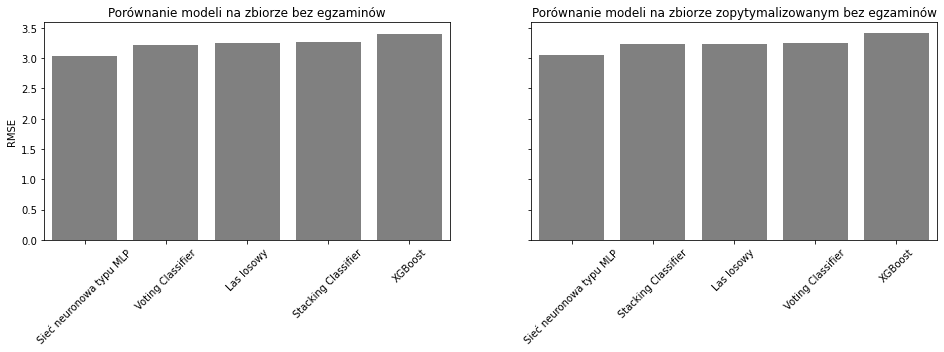

In [86]:
plot_results(rfc_tunned_mse, xgbc_tunned_mse,
             clf_tunned_mse, vc_tunned_mse,
             mlpc_tunned_mse, [None]*4,
             False)

### Kroswalidacja

In [87]:
from sklearn.model_selection import cross_validate

In [88]:
def get_mean(model_cv):
    return abs(model_cv['test_score'].mean())

In [89]:
def cross_validate_all(model_with_exams, model_without_exams,
    model_with_exams_optimized, model_without_exams_optimized):
    
    models_cv = [0] * 4
    
    models_cv[0] = cross_validate(model_with_exams, X_with_exams, y, scoring='neg_root_mean_squared_error',
                                   cv=5, n_jobs=-1)
    
    models_cv[1] = cross_validate(model_without_exams, X_without_exams, y, scoring='neg_root_mean_squared_error',
                                   cv=5, n_jobs=-1)
    
    models_cv[2] = cross_validate(model_with_exams_optimized, X_with_exams_optimized, y,
                                  scoring='neg_root_mean_squared_error',
                                   cv=5, n_jobs=-1)
    
    models_cv[3] = cross_validate(model_without_exams_optimized, X_without_exams_optimized, y,
                                  scoring='neg_root_mean_squared_error',
                                   cv=5, n_jobs=-1)
    
    models_mean = [get_mean(model_cv) for model_cv in models_cv]
    
    return models_mean

* Las losowy

In [90]:
rfc_mean = cross_validate_all(rfc_with_exams, rfc_without_exams,
                              rfc_with_exams_optimized, rfc_without_exams_optimized)

In [91]:
rfc_tunned_mean = cross_validate_all(rfc_tunned_with_exams, rfc_tunned_without_exams,
                                     rfc_tunned_with_exams_optimized, rfc_tunned_without_exams_optimized)

* XGBoost

In [92]:
xgbc_mean = cross_validate_all(xgbc_with_exams, xgbc_without_exams,
                               xgbc_with_exams_optimized, xgbc_without_exams_optimized)

In [93]:
xgbc_tunned_mean = cross_validate_all(xgbc_tunned_with_exams, xgbc_tunned_without_exams,
                                      xgbc_tunned_with_exams_optimized, xgbc_tunned_without_exams_optimized)

* Stacking Classifier

In [94]:
clf_mean = cross_validate_all(clf_with_exams, clf_without_exams,
                               clf_with_exams_optimized, clf_without_exams_optimized)
                               
clf_tunned_mean = cross_validate_all(clf_tunned_with_exams, clf_tunned_without_exams,
                                      clf_tunned_with_exams_optimized, clf_tunned_without_exams_optimized)

* Voting Classifier

In [95]:
vc_mean = cross_validate_all(vc_with_exams, vc_without_exams,
                               vc_with_exams_optimized, vc_without_exams_optimized)
                               
vc_tunned_mean = cross_validate_all(vc_tunned_with_exams, vc_tunned_without_exams,
                                      vc_tunned_with_exams_optimized, vc_tunned_without_exams_optimized)

* Sieć neuronowa typu MLP

In [96]:
mlpc_mean = cross_validate_all(mlpc_with_exams, mlpc_without_exams,
                               mlpc_with_exams_optimized, mlpc_without_exams_optimized)
                               
mlpc_tunned_mean = cross_validate_all(mlpc_tunned_with_exams, mlpc_tunned_without_exams,
                                      mlpc_tunned_with_exams_optimized, mlpc_tunned_without_exams_optimized)

* Regresja liniowa

In [97]:
lr_mean = cross_validate_all(lr_with_exams, lr_without_exams,
                             lr_with_exams_optimized, lr_without_exams_optimized)

## Ostateczne wyniki

In [98]:
def final_results(rfc_mse, xgbc_mse, clf_mse, vc_mse, mlpc_mse,
                 rfc_tunned_mse, xgbc_tunned_mse, clf_tunned_mse, vc_tunned_mse, mlpc_tunned_mse,
                 lr_mse):
    unique_models_names = ['Las losowy', 'XGBoost', 'Stacking Classifier',
                       'Voting Classifier', 'Sieć neuronowa typu MLP']
    models_names = ['Las losowy', 'XGBoost', 'Stacking Classifier',
                    'Voting Classifier', 'Sieć neuronowa typu MLP'] * 2 + ['Regresja liniowa']
    unique_models_names = unique_models_names + ['Regresja liniowa']
    
    models_type = ["basic"] * 5 + ['tunned'] * 5 + ['basic']
    models = [models_names, models_type]
    
    values = [[rfc_mse[i], xgbc_mse[i], clf_mse[i], vc_mse[i], mlpc_mse[i],
                        rfc_tunned_mse[i], xgbc_tunned_mse[i], clf_tunned_mse[i],
                         vc_tunned_mse[i], mlpc_tunned_mse[i],
                        lr_mse[i]] for i in range(0, 4)]
    
    idx = pd.IndexSlice
    
    results = pd.DataFrame(data = {
        'set_with_exams': values[0],
        'set_without_exams': values[1],
        'set_with_exams_optimized': values[2],
        'set_without_exams_optimized': values[3]
    }, index = models)
    results.sort_index(inplace=True)
    
    results = results.loc[idx[unique_models_names + ['Regresja liniowa'], :], :]
    
    return results

### Bez kroswalidacji

In [99]:
final_results(rfc_mse, xgbc_mse, clf_mse, vc_mse, mlpc_mse,
              rfc_tunned_mse, xgbc_tunned_mse, clf_tunned_mse, vc_tunned_mse, mlpc_tunned_mse,
              lr_mse)

set_with_exams  set_without_exams  \
Las losowy              basic         1.609268           3.244720   
                        tunned        1.419642           3.256552   
XGBoost                 basic         1.320451           2.980277   
                        tunned        1.373747           3.402865   
Stacking Classifier     basic         1.248589           3.066778   
                        tunned        1.632993           3.261272   
Voting Classifier       basic         1.312660           2.977695   
                        tunned        1.362501           3.213752   
Sieć neuronowa typu MLP basic         1.755577           3.293350   
                        tunned        1.623545           3.039906   
Regresja liniowa        basic         1.272994           3.000855   

                                set_with_exams_optimized  \
Las losowy              basic                   1.581949   
                        tunned                  1.614041   
XGBoost                 basic                   1.264911   
                        tunned                  1.337813   
Stacking Classifier     basic                   1.152478   
                        tunned                  1.609268   
Voting Classifier       basic                   1.285022   
                        tunned                  1.341641   
Sieć neuronowa typu MLP basic                   1.894662   
                        tunned                  1.648620   
Regresja liniowa        basic                   1.240347   

                                set_without_exams_optimized  
Las losowy              basic                      3.219333  
                        tunned                     3.233637  
XGBoost                 basic                      3.099214  
                        tunned                     3.419402  
Stacking Classifier     basic                      3.022989  
                        tunned                     3.232844  
Voting Classifier       basic                      2.972524  
                        tunned                     3.245510  
Sieć neuronowa typu MLP basic                      3.408135  
                        tunned                     3.055050  
Regresja liniowa        basic                      3.011091

### Z kroswalidacją

In [100]:
final_results(rfc_mean, xgbc_mean, clf_mean, vc_mean, mlpc_mean,
              rfc_tunned_mean, xgbc_tunned_mean, clf_tunned_mean, vc_tunned_mean, mlpc_tunned_mean,
              lr_mean)

set_with_exams  set_without_exams  \
Las losowy              basic         1.727201           3.246242   
                        tunned        1.533115           3.122996   
XGBoost                 basic         1.469001           3.626783   
                        tunned        1.478754           3.285428   
Stacking Classifier     basic         1.408419           3.154920   
                        tunned        1.670129           3.252998   
Voting Classifier       basic         1.456462           3.587236   
                        tunned        1.379078           3.184158   
Sieć neuronowa typu MLP basic         1.908066           3.445904   
                        tunned        1.886850           3.028987   
Regresja liniowa        basic         1.369499           2.767701   

                                set_with_exams_optimized  \
Las losowy              basic                   1.799826   
                        tunned                  1.638420   
XGBoost                 basic                   1.436691   
                        tunned                  1.495278   
Stacking Classifier     basic                   1.376968   
                        tunned                  1.584846   
Voting Classifier       basic                   1.384069   
                        tunned                  1.518213   
Sieć neuronowa typu MLP basic                   1.893659   
                        tunned                  1.701265   
Regresja liniowa        basic                   1.363295   

                                set_without_exams_optimized  
Las losowy              basic                      3.334156  
                        tunned                     3.091979  
XGBoost                 basic                      3.789112  
                        tunned                     3.244009  
Stacking Classifier     basic                      3.125379  
                        tunned                     3.251878  
Voting Classifier       basic                      3.560664  
                        tunned                     3.157252  
Sieć neuronowa typu MLP basic                      3.417692  
                        tunned                     3.040482  
Regresja liniowa        basic                      2.741125

In [101]:
stop = datetime.now()

In [102]:
# calosc
str(stop - start)

'0:08:56.198958'

In [103]:
# preparing data time
str(stop_prepare_data - start)

'0:00:05.221964'

In [104]:
# fitting basic time
str(stop_fitting_basic - stop_prepare_data)

'0:01:02.067330'

In [105]:
# tunning time
str(stop_tunning - stop_fitting_basic)

'0:04:23.597319'

In [106]:
# crossvalidation time
str(stop - stop_tunning)

'0:03:25.312345'

In [107]:
# start -> stop_prepare_data -> stop_fitting_basic -> stop_tunning -> stop 

In [108]:
def best_params_df(model_rand, name):
    params = {}
    
    feature_sets_names = ["With exams", "Without exams", "With exams optimized", "Without exams optimized"]
    
    best_params = [model.best_params_ for model in model_rand]
    
    output = {}
    for i in range(4):
        output[feature_sets_names[i]] = best_params[i]
        
    params[name] = output
    
    x = pd.DataFrame(data = params)
    
    x['name'] = [name]*4
    x.set_index(['name', x.index], inplace = True)
    x.index.names = ["Model", "Feature set"]
    x.columns=['Hyperparameters']
    
    return x

In [109]:
def best_params_df_all(models_rand, names):
    
    frames = []
    
    for i in range(len(models_rand)):
        frames.append(best_params_df(models_rand[i], names[i]))
    
    results = pd.concat(frames)
    
    return results

In [110]:
models_rand = [rfc_rand, xgbc_rand, mlpc_rand]

In [111]:
names = ['Las losowy', 'XGBoost', 'Sieć neuronowa typu MLP']

In [112]:
best_params_df_all(models_rand, names)

Hyperparameters
Model                   Feature set                                                                                                                                                                                                            
Las losowy              With exams                                                                                                                         {'min_samples_split': 6, 'max_features': 10, 'max_depth': 6, 'criterion': 'entropy'}
                        With exams optimized                                                                                                               {'min_samples_split': 6, 'max_features': 10, 'max_depth': 6, 'criterion': 'entropy'}
                        Without exams                                                                                                                       {'min_samples_split': 4, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'}
                        Without exams optimized                                                                                                             {'min_samples_split': 4, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy'}
XGBoost                 With exams                                                                                                             {'booster': 'dart', 'learning_rate': 0.008250781339763612, 'max_without_exams_optimizedepth': 7}
                        With exams optimized                                                                                                 {'booster': 'gbtree', 'learning_rate': 0.018289492658229912, 'max_without_exams_optimizedepth': 4}
                        Without exams                                                                                                      {'booster': 'gblinear', 'learning_rate': 0.08146397256356941, 'max_without_exams_optimizedepth': 10}
                        Without exams optimized                                                                                            {'booster': 'gblinear', 'learning_rate': 0.06682711447416938, 'max_without_exams_optimizedepth': 10}
Sieć neuronowa typu MLP With exams                   {'activation': 'relu', 'alpha': 0.03899660137584881, 'batch_size': 60, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'momentum': 0.41893439668259447, 'solver': 'adam'}
                        With exams optimized     {'activation': 'logistic', 'alpha': 0.03233052812016968, 'batch_size': 40, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'momentum': 0.1391462519849035, 'solver': 'lbfgs'}
                        Without exams               {'activation': 'tanh', 'alpha': 0.00010898794623297014, 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'momentum': 0.4936352725997194, 'solver': 'sgd'}
                        Without exams optimized     {'activation': 'tanh', 'alpha': 0.00010898794623297014, 'batch_size': 10, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'momentum': 0.4936352725997194, 'solver': 'sgd'}

In [113]:
def plot_results_all(rfc_mse, xgbc_mse,
                     clf_mse, vc_mse,
                     mlpc_mse, lr_mse,
                     rfc_tunned_mse, xgbc_tunned_mse,
                     clf_tunned_mse, vc_tunned_mse,
                     mlpc_tunned_mse, save_name = None):
    fig, axs = plt.subplots(2, 2, figsize = (16, 12), sharey = True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    x= np.array(['Las losowy', 'XGBoost', 'Stacking Classifier', 'Voting Classifier',
                 'Sieć neuronowa typu MLP', 'Regresja liniowa']*2)
    y = [0] * 4
    for i in range(4):
        y[i] = np.array([rfc_mse[i], xgbc_mse[i], clf_mse[i], 
                      vc_mse[i], mlpc_mse[i], lr_mse[i], 
                      rfc_tunned_mse[i], xgbc_tunned_mse[i], clf_tunned_mse[i], 
                      vc_tunned_mse[i], mlpc_tunned_mse[i], np.nan])
    z = ['basic'] * 6 + ['tunned'] * 6

    feature_sets = ["With exams", "Without exams", "With exams optimized", "Without exams optimized"]

    plot_data = pd.DataFrame({
            'x': x,
            'y_0': y[0],
            'y_1': y[1],
            'y_2': y[2],
            'y_3': y[3],
            'z': z})

    for i in range(4):
        j = 0 if i < 2 else 1

        g = sns.barplot(data = plot_data, x='x', hue= 'z', y='y_' + str(i),
               order = plot_data.loc[plot_data.z =="tunned",:].sort_values("y_" + str(i)).x, ax=axs[i%2][j])
        g.legend().set_title('Feature set type')

        axs[i%2][j].set_title("Feature set: " + feature_sets[i])

        axs[i%2][j].set_ylabel("")
        axs[i%2][j].set_xlabel("")

        for tick in axs[i%2][j].get_xticklabels():
            tick.set_rotation(45)
        if i > 0:
            axs[i%2][j].get_legend().remove()


    fig.text(0.5, -0.04, 'Model', ha='center', fontsize = 16)    
    fig.text(0.04, 0.5, 'RMSE', va='center', rotation='vertical', fontsize = 16)

    if save_name is not None:
        plt.savefig(save_name)
    
    plt.show()

### Wizualizacja wyników bez kroswalidacji

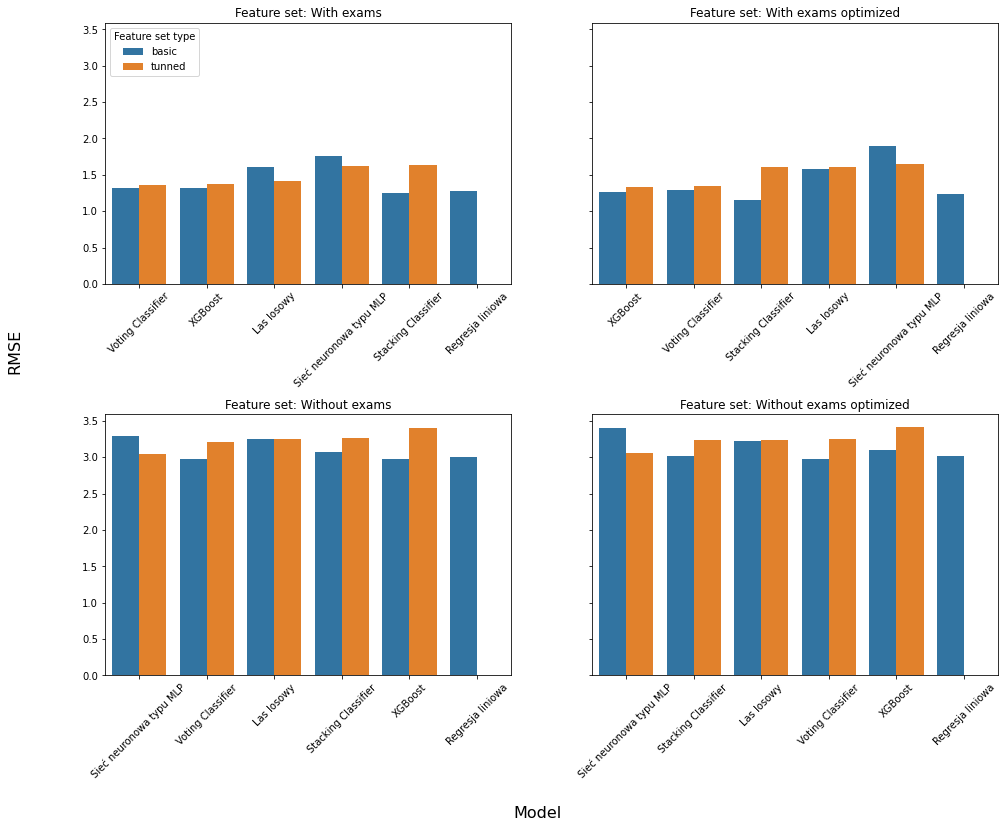

In [114]:
plot_results_all(rfc_mse, xgbc_mse,
                 clf_mse, vc_mse,
                 mlpc_mse, lr_mse,
                 rfc_tunned_mse, xgbc_tunned_mse,
                 clf_tunned_mse, vc_tunned_mse,
                 mlpc_tunned_mse, 'no_cv_result.jpg')

### Wizualizacja wyników z kroswalidacją

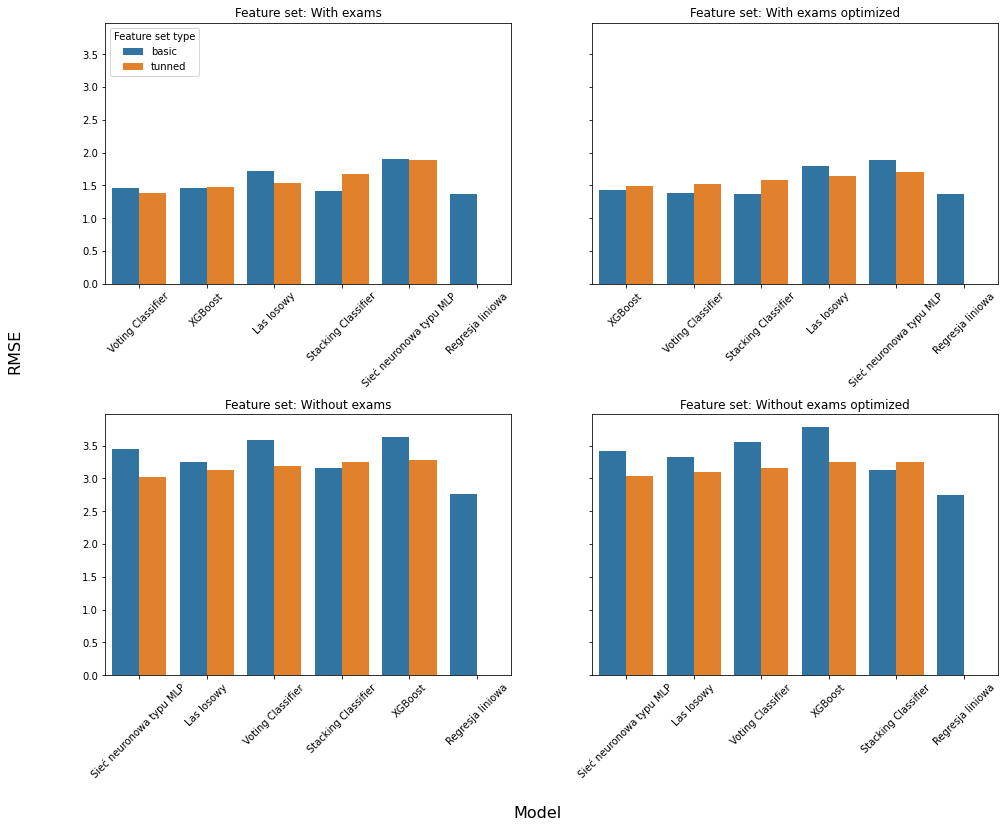

In [115]:
plot_results_all(rfc_mean, xgbc_mean,
                 clf_mean, vc_mean,
                 mlpc_mean, lr_mean,
                 rfc_tunned_mean, xgbc_tunned_mean,
                 clf_tunned_mean, vc_tunned_mean,
                 mlpc_tunned_mean, 'cv_results.jpg')

In [116]:
def DrawPlotBest(y_test, y_hat, classifiers, save_name = None):
    
    feature_sets = ["With exams", "Without exams", "With exams optimized", "Without exams optimized"] 
    
    fig, axs = plt.subplots(2, 2, figsize = (16,8), sharey = True, sharex=True)
    
    for i in range(4):
        j = 0 if i < 2 else 1
        
        axs[i%2][j].scatter (x = y_hat[i], y = y_test[i], color = "#FFC300")
        axs[i%2][j].plot([0, 20], [0, 20], color = "black")
        axs[i%2][j].set_title(classifiers[i] + "\nFeature set: " + feature_sets[i] +
              " - RMSE = " + str(round(mean_squared_error(y_test[i], y_hat[i], squared = False), 4)))
        if j == 0:
            axs[i%2][j].set_ylabel("Gold standard")
        if i%2 == 1:
            axs[i%2][j].set_xlabel("Wartość przybliżona")
    fig.suptitle('Best classifiers for each feature set', fontsize=18)
    if save_name is not None:
        plt.savefig(save_name)
    plt.show()

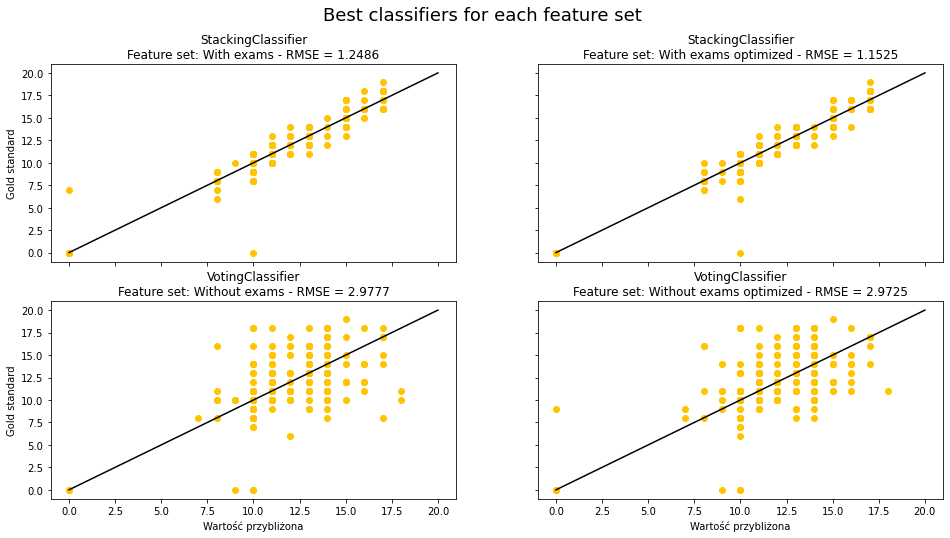

In [117]:
DrawPlotBest(y_test, [clf_hat[0], vc_hat[1], clf_hat[2], vc_hat[3]],
             ["StackingClassifier", "VotingClassifier", "StackingClassifier", "VotingClassifier"],
            "best_classifiers.jpg")

### Wyniki skalowania 

In [118]:
pd.read_csv('scaling_results.csv').set_index(['Unnamed: 0', 'Unnamed: 1'])

set_with_exams  set_without_exams  \
Unnamed: 0              Unnamed: 1                                      
Las losowy              basic             1.727201           3.246242   
                        tunned            1.533115           3.122996   
XGBoost                 basic             1.469001           3.626783   
                        tunned            1.478754           3.285428   
Stacking Classifier     basic             1.408419           3.154920   
                        tunned            1.670129           3.252998   
Voting Classifier       basic             1.456462           3.587236   
                        tunned            1.379078           3.184158   
Sieć neuronowa typu MLP basic             1.908066           3.445904   
                        tunned            1.886850           3.028987   
Regresja liniowa        basic             1.369499           2.767701   

                                    set_with_exams_optimized  \
Unnamed: 0              Unnamed: 1                             
Las losowy              basic                       1.799826   
                        tunned                      1.638420   
XGBoost                 basic                       1.436691   
                        tunned                      1.495278   
Stacking Classifier     basic                       1.376968   
                        tunned                      1.584846   
Voting Classifier       basic                       1.384069   
                        tunned                      1.518213   
Sieć neuronowa typu MLP basic                       1.893659   
                        tunned                      1.701772   
Regresja liniowa        basic                       1.363295   

                                    set_without_exams_optimized  
Unnamed: 0              Unnamed: 1                               
Las losowy              basic                          3.334156  
                        tunned                         3.091979  
XGBoost                 basic                          3.789112  
                        tunned                         3.702968  
Stacking Classifier     basic                          3.125379  
                        tunned                         3.189114  
Voting Classifier       basic                          3.560664  
                        tunned                         3.346239  
Sieć neuronowa typu MLP basic                          3.417692  
                        tunned                         3.040482  
Regresja liniowa        basic                          2.741125